<a href="https://colab.research.google.com/github/Diego-Retama/EDP-1/blob/main/Laplace_Ejercicio_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de una solución de la ecuación de Laplace

La solución de la ecuación 
$$\frac{\partial^2 u}{\partial x^2} +\frac{\partial^2 u}{\partial y^2}= 0$$
sujeta a las condiciones de frontera:
$$u(0,y)=10y,\;\;\;u_x(1,y)=-1, \;\;\; 0<y<1$$

$$ u(x,0) =u(x,1)=0 \;\;\; 0<x<1
 $$

Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty}( \frac{10(-1)^{n+1}cosh(n \pi x)}{n} +  (\frac{((-1)^{n}-1)}{ncosh(n \pi)}- \frac{10(-1)^{n+1}senh(n \pi)}{ncosh(n\pi)})senh(n \pi x) )sen(n \pi y).$$

Este problema modela la transferencia de calor en una placa rectangular, con $k=1$.

In [ ]:
from pylab import *

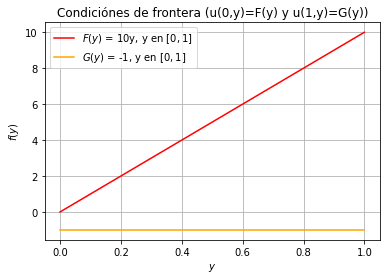

In [132]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,200)

x1 = np.linspace(0, 1,200)
x2 = np.linspace(0, 1,200)

plot(x1, [10*x for x in x1], 'r',label='$F(y)$ = 10y, y en $[0, 1]$')
plot(x2, [-1 for x in x2], 'orange',label='$G(y)$ = -1, y en $[0, 1]$')

plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Condiciónes de frontera (u(0,y)=F(y) y u(1,y)=G(y))"),grid(),legend()
show()

Para empezar, graficamos la condición inicial.

Usamos una serie de Fourier para aproximar la condición de frontera $u(0,y)=F(0)=10y$.

In [ ]:
def u_0(x,N=10): 
    f = zeros(len(x))
    for n in range(1,N):
        f += (((-1)**(n+1))/n)*sin(n*pi*x)
    return (20.0/pi)*f

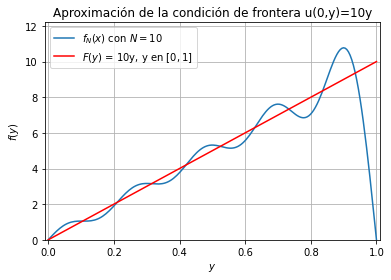

In [133]:
f_n = u_0(x)
plot(x,f_n,label='$f_N(x)$ con $N=10$')
plot(x1, [10*x for x in x1], 'r',label='$F(y)$ = 10y, y en $[0, 1]$')

plt.ylabel('$f(y)$'); plt.xlabel('$y$'); 
plt.title("Aproximación de la condición de frontera u(0,y)=10y")
xlim([-0.01,1.01]),ylim([0.0,12.2]),grid(),legend()
show()

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

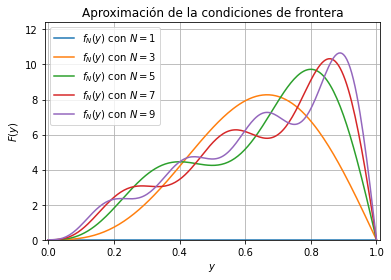

In [134]:
for i in range(1,10,2):
    plot(x,u_0(x,i),label='$f_N(y)$ con $N=%d$' %i)
plt.xlabel('$y$'); plt.ylabel('$F(y)$'); 
plt.title("Aproximación de la condiciones de frontera")
xlim([-0.01,1.01]),ylim([0.0,12.4]),grid(),legend()
show()

Ahora, agregamos la parte de y para visualizar la solución completa. Primero, con, $x=0$.

In [ ]:
def u_x_y(x,y,N=10):
    f = zeros( (len(x),len(y)) )
    for i in range(len(y)):
        for n in range(1,N):
            f[:,i] += ((((10*(-1)**(n+1))*cosh(n*pi*y))/n)+(((-1)**(n)-1)-10*(-1)**(n+1)*sinh(n*pi)*sinh(n*pi*y))/(n*cosh(n*pi)))*sin(n*pi*x)
    return (2.0/pi)*f

In [ ]:
x = linspace(0,1,100)
y = 0.1*linspace(0,1,100)
U = u_x_y(x,y)

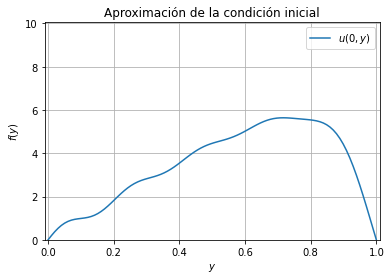

In [ ]:
plot(x,U[:,0],label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$F(y)$'); 
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([0.0,10.05]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $x \to 1$.

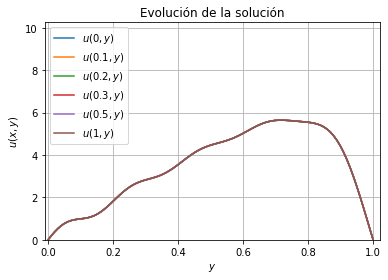

In [ ]:
plot(x,U[:,0],label='$u(0,y)$') 
plot(x,U[:,1],label='$u(0.1,y)$')
plot(x,U[:,2],label='$u(0.2,y)$')
plot(x,U[:,3],label='$u(0.3,y)$')
plot(x,U[:,5],label='$u(0.5,y)$')
plot(x,U[:,10],label='$u(1,y)$')
plt.xlabel('$y$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.02]),ylim([0.0,10.25]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

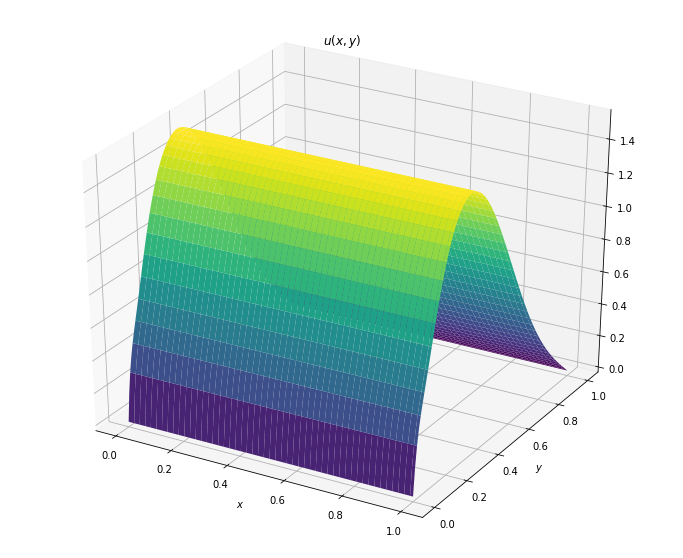

In [ ]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0.0,1.0,100)
y = linspace(0.0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title('$u(x,y)$')
ax.plot_surface(X, Y, U, cmap="viridis"); #Otros colores:"viridis", "inferno", "plasma"